In [73]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Algorithm 1: RLS

    1 Choose x uniformly at random from {0, 1}^n;
    2 while stopping criterion not met do
    3   y ← x;
    4   Choose i uniformly at random from {1, . . . , n};
    5   yi ← (1 − yi);
    6   if f(y) ≥ f(x) then x ← y;

### Target functions

In [67]:
def one_max_algo(x):
    return x.sum()

def one_max_sc(x):
    # Return if x is the maximal possible value
    return oneMax(x) == len(x)

one_max = (one_max_algo, one_max_sc)

### Optimization functions 

In [68]:
def rls(n, target_func, stopping_criterion, only_greater=False):
    x = np.random.randint(0, 2, n)
    steps = 0
    while not stopping_criterion(x):
        y = x.copy()
        idx = np.random.randint(len(y))
        y[idx] = not y[idx]
        if (target_func(y) > target_func(x) or
                (not only_greater and target_func(y) == target_func(x))):
            x = y
        steps += 1
    return steps

### Evaluation

In [196]:
def evaluate(n, opt_func, setting, only_greater=False):
    runtimes = np.zeros(10)
    for i in range(10):
        runtimes[i] = opt_func(n, *setting, only_greater=False)
    return runtimes

def evaluate_all(ns, opt_func, setting, filename, only_greater=False, plot=True):
    runtimes = np.zeros((len(ns), 10))
    for i, n in enumerate(ns):
        runtimes[i] = evaluate(n, opt_func, setting, only_greater=False)
        print(".", end="")
    print("")
    if plot:
        fig, ax = plt.subplots(1, 1, figsize=(16, 8))
        ax.boxplot(runtimes.T[1:], showfliers=False, showcaps=False,
                   whis=False, showmeans=True, medianprops={'color': 'gray'})
        plt.xticks(np.arange(1, len(ns) + 1, len(ns) // 20), ns[::len(ns) // 20])
        fig.savefig(filename)
    return runtimes

................................................................................
Wall time: 11.5 s


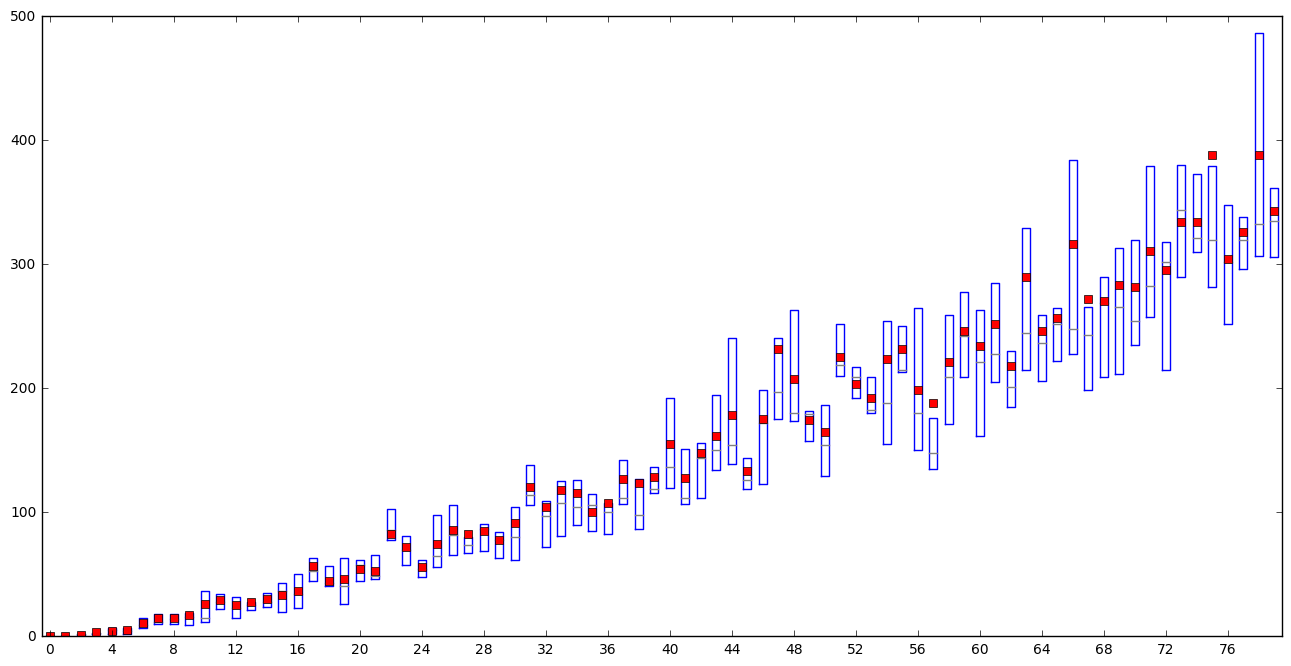

In [197]:
%time runtimes = evaluate_all(np.arange(0, 80, 1), rls, one_max, "rls_one_max_2000.pdf")